<a href="https://colab.research.google.com/github/smritiirani/Stock-sentiment-analysis/blob/main/StockSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
df=pd.read_csv(r"/Data.csv", encoding = "ISO-8859-1")
print(df.head())
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

         Date  Label                                               Top1  \
0  2000-01-03      0  A 'hindrance to operations': extracts from the...   
1  2000-01-04      0                                          Scorecard   
2  2000-01-05      0                  Coventry caught on counter by Flo   
3  2000-01-06      1                      Pilgrim knows how to progress   
4  2000-01-07      1                               Hitches and Horlocks   

                                 Top2  \
0                           Scorecard   
1                 The best lake scene   
2  United's rivals on the road to Rio   
3                 Thatcher facing ban   
4      Beckham off but United survive   

                                            Top3  \
0                Hughes' instant hit buoys Blues   
1                  Leader: German sleaze inquiry   
2  Thatcher issues defence before trial by video   
3        McIlroy calls for Irish fighting spirit   
4                        Breast cancer scr

In [9]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [10]:
# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
print(data.head(5))

                                                   0  \
0  A  hindrance to operations   extracts from the...   
1                                          Scorecard   
2                  Coventry caught on counter by Flo   
3                      Pilgrim knows how to progress   
4                               Hitches and Horlocks   

                                    1  \
0                           Scorecard   
1                 The best lake scene   
2  United s rivals on the road to Rio   
3                 Thatcher facing ban   
4      Beckham off but United survive   

                                               2  \
0                Hughes  instant hit buoys Blues   
1                  Leader  German sleaze inquiry   
2  Thatcher issues defence before trial by video   
3        McIlroy calls for Irish fighting spirit   
4                        Breast cancer screening   

                                               3  \
0       Jack gets his skates on at ice cold Alex   

In [11]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
print(data.head(1))

                                                   0          1  \
0  a  hindrance to operations   extracts from the...  scorecard   

                                 2                                         3  \
0  hughes  instant hit buoys blues  jack gets his skates on at ice cold alex   

                                        4  \
0  chaos as maracana builds up for united   

                                                   5  \
0  depleted leicester prevail as elliott spoils e...   

                                  6                                  7  \
0  hungry spurs sense rich pickings  gunners so wide of an easy target   

                                               8  \
0  derby raise a glass to strupar s debut double   

                                          9  ...  \
0  southgate strikes  leeds pay the penalty  ...   

                                         15  \
0  flintoff injury piles on woe for england   

                                              

In [12]:
print(' '.join(str(x) for x in data.iloc[1,0:25]))

scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite


In [13]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
print(headlines[0])

a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [15]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [16]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [17]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [22]:
from textblob import TextBlob

sentiments = []
for headline in test_transform:
    blob = TextBlob(headline)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        sentiments.append('Positive')
    else:
        sentiments.append('Negative')
test['Sentiment'] = sentiments
print(test[['Date', 'Label', 'Sentiment']])

            Date  Label Sentiment
3723  2015-01-02      1  Negative
3724  2015-01-05      0  Positive
3725  2015-01-06      0  Positive
3726  2015-01-07      1  Positive
3727  2015-01-08      1  Negative
...          ...    ...       ...
4096  2016-06-27      0  Negative
4097  2016-06-28      1  Positive
4098  2016-06-29      1  Positive
4099  2016-06-30      1  Positive
4100  2016-07-01      1  Negative

[378 rows x 3 columns]


<ipython-input-22-60a1ef067197>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sentiment'] = sentiments


In [23]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Perform NER on the headlines
ner_results = []
for headline in headlines:
    doc = nlp(headline)
    ner_entities = [(entity.text, entity.label_) for entity in doc.ents]
    ner_results.append(ner_entities)

In [25]:
# Print the NER results
for i, result in enumerate(ner_results):
    print(f"Headline {i+1}:")
    for entity in result:
        print(f"Entity: {entity[0]}, Type: {entity[1]}")
    print()


Streaming output truncated to the last 5000 lines.
Entity: billions, Type: CARDINAL
Entity: boston, Type: GPE
Entity: canadian, Type: NORP
Entity: canadian, Type: NORP
Entity: john key, Type: PERSON
Entity: new zealand, Type: GPE
Entity: the trans pacific partnership, Type: ORG
Entity: amazonians, Type: NORP
Entity: europe, Type: LOC
Entity: jehovah s, Type: PERSON
Entity: microsoft, Type: ORG
Entity: malaysian, Type: NORP
Entity: france, Type: GPE
Entity: thursday, Type: DATE
Entity: london, Type: GPE
Entity: islam, Type: NORP
Entity: london, Type: GPE
Entity: the weekend, Type: DATE
Entity: peru, Type: GPE
Entity: philip morris, Type: ORG
Entity: australian, Type: NORP
Entity: north korean, Type: NORP
Entity: lgbt, Type: PERSON
Entity: poland, Type: GPE
Entity: first, Type: ORDINAL
Entity: obama, Type: GPE
Entity: african, Type: NORP
Entity: nato, Type: ORG
Entity: uk, Type: GPE
Entity: libya, Type: GPE
Entity: the years, Type: DATE
Entity: libya, Type: GPE
Entity: moammar gadhafi s 

In [28]:
user_input = input("Enter a string: ")
import re
# Preprocess the user input
clean_input = re.sub("[^a-zA-Z]", " ", user_input)
clean_input = clean_input.lower()
# Perform sentiment analysis on the user input
blob = TextBlob(clean_input)
sentiment = blob.sentiment.polarity

if sentiment > 0:
    sentiment_label = 'Positive'
elif sentiment < 0:
    sentiment_label = 'Negative'
else:
    sentiment_label = 'Neutral'

# Print the sentiment analysis result
print(f"Sentiment: {sentiment_label}")

Enter a string: he is a bad person.
Sentiment: Negative


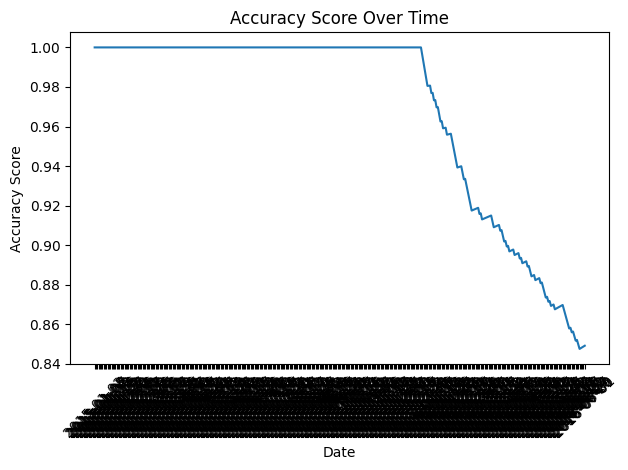

In [41]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = []

# Dates for x-axis
dates = test['Date']

# Loop through the predictions and calculate accuracy scores
for i in range(len(predictions)):
    accuracy = accuracy_score(test['Label'][:i+1], predictions[:i+1])
    accuracy_scores.append(accuracy)

# Plotting the accuracy scores
plt.plot(dates, accuracy_scores)
plt.xlabel('Date')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


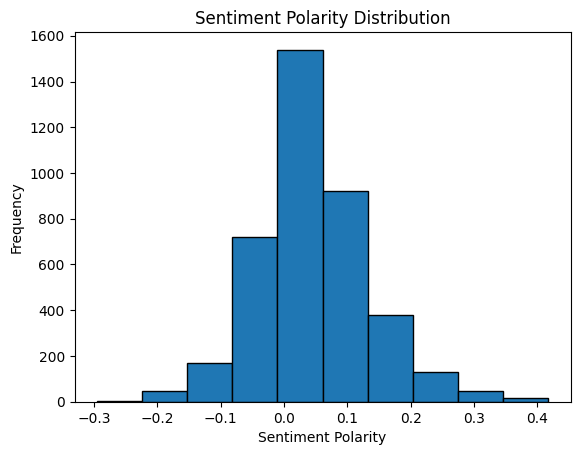

In [30]:
import matplotlib.pyplot as plt

# Sentiment polarities
polarities = [TextBlob(headline).sentiment.polarity for headline in headlines]

# Plotting the histogram
plt.hist(polarities, bins=10, edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Distribution')
plt.show()


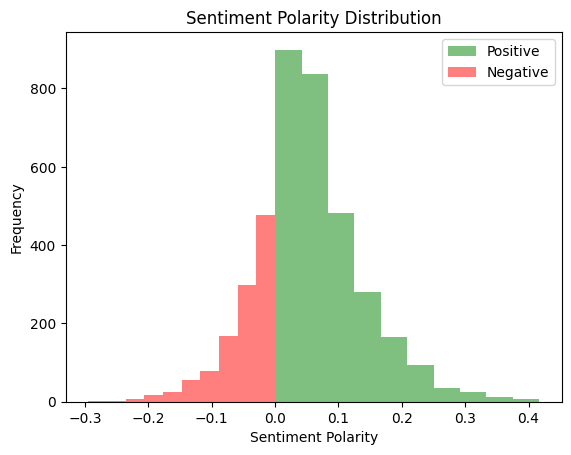

In [31]:
import matplotlib.pyplot as plt

# Sentiment polarities
positive_polarities = [TextBlob(headline).sentiment.polarity for headline in headlines if TextBlob(headline).sentiment.polarity > 0]
negative_polarities = [TextBlob(headline).sentiment.polarity for headline in headlines if TextBlob(headline).sentiment.polarity < 0]

# Plotting the histograms
plt.hist(positive_polarities, bins=10, color='green', alpha=0.5, label='Positive')
plt.hist(negative_polarities, bins=10, color='red', alpha=0.5, label='Negative')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Distribution')
plt.legend()
plt.show()


In [43]:
# Implementing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

randomclassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomclassifier.fit(traindataset, train['Label'])

# Predictions using Random Forest Classifier
rf_predictions = randomclassifier.predict(test_dataset)
rf_matrix = confusion_matrix(test['Label'], rf_predictions)
rf_score = accuracy_score(test['Label'], rf_predictions)
rf_report = classification_report(test['Label'], rf_predictions)

print("Random Forest Classifier:")
print("Confusion Matrix:")
print(rf_matrix)
print("Accuracy Score:", rf_score)
print("Classification Report:")
print(rf_report)


Random Forest Classifier:
Confusion Matrix:
[[135  51]
 [ 11 181]]
Accuracy Score: 0.8359788359788359
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       186
           1       0.78      0.94      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.85      0.84      0.83       378



In [33]:
## Implementing Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(traindataset, train['Label'])
# Predictions using Naive Bayes Classifier
nb_predictions = naive_bayes_classifier.predict(test_dataset)
nb_matrix = confusion_matrix(test['Label'], nb_predictions)
nb_score = accuracy_score(test['Label'], nb_predictions)
nb_report = classification_report(test['Label'], nb_predictions)
print("\nNaive Bayes Classifier:")
print("Confusion Matrix:")
print(nb_matrix)
print("Accuracy Score:", nb_score)
print("Classification Report:")
print(nb_report)




Naive Bayes Classifier:
Confusion Matrix:
[[138  48]
 [ 10 182]]
Accuracy Score: 0.8465608465608465
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       186
           1       0.79      0.95      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378



In [36]:
## Implementing K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(traindataset, train['Label'])

# Predictions using K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_predictions = knn_classifier.predict(test_dataset)
knn_matrix = confusion_matrix(test['Label'], knn_predictions)
knn_score = accuracy_score(test['Label'], knn_predictions)
knn_report = classification_report(test['Label'], knn_predictions)
print("\nK-Nearest Neighbors Classifier:")
print("Confusion Matrix:")
print(knn_matrix)
print("Accuracy Score:", knn_score)
print("Classification Report:")
print(knn_report)



K-Nearest Neighbors Classifier:
Confusion Matrix:
[[ 18 168]
 [  0 192]]
Accuracy Score: 0.5555555555555556
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18       186
           1       0.53      1.00      0.70       192

    accuracy                           0.56       378
   macro avg       0.77      0.55      0.44       378
weighted avg       0.76      0.56      0.44       378



In [39]:
## Implementing Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(traindataset, train['Label'])
# Predictions using Logistic Regression Classifier
logistic_regression_predictions = logistic_regression_classifier.predict(test_dataset)
logistic_regression_matrix = confusion_matrix(test['Label'], logistic_regression_predictions)
logistic_regression_score = accuracy_score(test['Label'], logistic_regression_predictions)
logistic_regression_report = classification_report(test['Label'], logistic_regression_predictions)
print("\nLogistic Regression Classifier:")
print("Confusion Matrix:")
print(logistic_regression_matrix)
print("Accuracy Score:", logistic_regression_score)
print("Classification Report:")
print(logistic_regression_report)



Logistic Regression Classifier:
Confusion Matrix:
[[159  27]
 [ 27 165]]
Accuracy Score: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       186
           1       0.86      0.86      0.86       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378



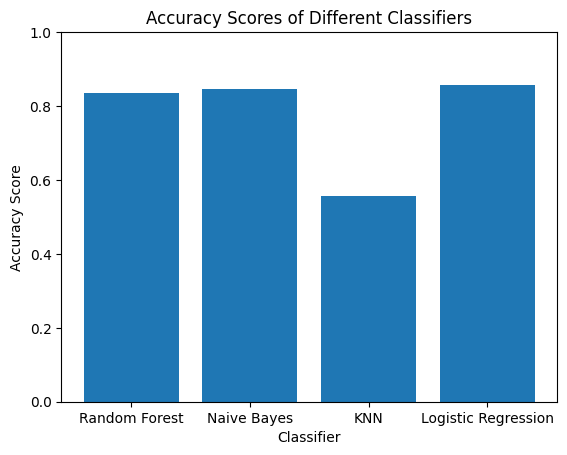

In [44]:
import matplotlib.pyplot as plt

classifiers = ['Random Forest', 'Naive Bayes', 'KNN', 'Logistic Regression']
accuracy_scores = [rf_score, nb_score, knn_score, logistic_regression_score]

plt.bar(classifiers, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers')
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1
plt.show()


In [ ]:
    # Precision: Precision is the ratio of true positive predictions to the total number of positive predictions.
    #  It indicates how well the classifier performs in correctly identifying positive instances.

    # Recall: Recall is the ratio of true positive predictions to the total number of actual positive instances.
    #  It measures the ability of the classifier to find all positive instances.

    # F1-score: The F1-score is the harmonic mean of precision and recall.
    #  It provides a balanced measure of the classifier's performance, taking into account both precision and recall.

    # Support: Support represents the number of occurrences of each class in the test dataset.